In [1]:
# load relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py


In [2]:
# upload file and inspect head and columns
soccer_data = pd.read_csv('data.csv')
print(soccer_data.head())
print(soccer_data.shape)
soccer_data.columns

   Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [3]:
# drop some redundant data between the LS and RB columns as they contain data I won't use in my analysis

print(soccer_data.columns.get_loc("LS")) # getting first index
print(soccer_data.columns.get_loc("RB")) # getting final index of data that will be dropped

# dropping the columns for the indexes
soccer_data.drop(soccer_data.iloc[:, 28:54], inplace=True, axis=1)
"""
Please note other columns might be dropped later. This is the initial drops based on what I saw based on quickly scanning the csv file
"""

28
53


'\nPlease note other columns might be dropped later. This is the initial drops based on what I saw based on quickly scanning the csv file\n'

In [4]:
# Inspecting that correct range of columns were dropped
print(soccer_data.shape)
soccer_data.columns

(18207, 63)


Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [5]:
# Looking at NAN data and whether additional columns should be dropped
print(soccer_data.isna().sum())
# inspecting the columns I could not see with previous call (How does one remove these limitations?)
print(soccer_data.HeadingAccuracy.isna().sum())
print(soccer_data.ShortPassing.isna().sum())
print(soccer_data.Volleys.isna().sum())
print(soccer_data.ShortPassing.isna().sum())

# all good data columns have 48 missing values

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing     

In [6]:
# dropping additional redundant columns or data that I wont work with
soccer_data.drop(['Joined', 'Loaned From', 'Contract Valid Until', 'Release Clause', 'Photo', 'Jersey Number'], axis=1, inplace=True)
soccer_data.shape # confirms the columns has bee dropped


(18207, 57)

In [7]:
soccer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null o

In [8]:
# Replacing nulls in the "club and Poistion" columns with not assigned (as the were "object" types on which i wont be able to assign mean imputation)
soccer_data["Club"].fillna("Not assigned", inplace = True)
soccer_data["Position"].fillna("Not assigned", inplace = True)
soccer_data["Preferred Foot"].fillna("Not assigned", inplace = True)
soccer_data["Work Rate"].fillna("Not assigned", inplace = True) 
soccer_data["Body Type"].fillna("Not assigned", inplace = True) 
soccer_data["Real Face"].fillna("Not assigned", inplace = True)
soccer_data["Height"].fillna("Not assigned", inplace = True)
                
                
soccer_data[["Club", "Position"]].info() # inspecting that the values went up

soccer_data['Weight'] = soccer_data['Weight'].str.replace('lbs','')
soccer_data['Weight'] = soccer_data['Weight'].astype(np.float64)
'''
Now to decide what to do with 48 missing values in rest of dataframe
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 2 columns):
Club        18207 non-null object
Position    18207 non-null object
dtypes: object(2)
memory usage: 284.6+ KB


'\nNow to decide what to do with 48 missing values in rest of dataframe\n'

In [9]:
"""
Since 48 rows constitute a very low amount I decided to make use of imputation by averaging out the missing values, since most 
of these would be used for correlation and comparison purposes when doing visualisations.
"""
soccer_data.fillna(soccer_data.mean(), inplace=True)

In [10]:
soccer_data.info() # inspecting that all columns are now the same amounts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        18207 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18207 non-null object
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Work Rate                   18207 non-null o

In [11]:
# making some final changes by removing wage column string type and converting to int64
soccer_data['Wage'] = soccer_data['Wage'].str.replace('€','')
soccer_data['Wage'] = soccer_data['Wage'].str.replace('K','')
soccer_data['Wage'] = soccer_data['Wage'].astype(np.int64)
soccer_data['Wage'].head()

0    565
1    405
2    290
3    260
4    355
Name: Wage, dtype: int64

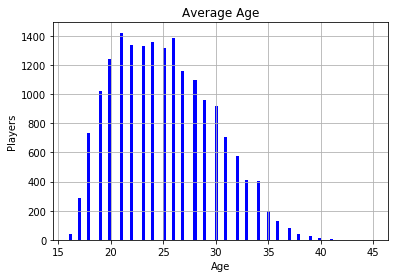

In [12]:
# histogram on spread of player ages
soccer_data.Age.plot(kind = 'hist',bins= 100, color= 'blue',label = 'Age', alpha = 1.0, grid = True, linestyle = '-')

plt.legend
plt.xlabel('Age')
plt.ylabel('Players')
plt.title('Average Age')
plt.show()

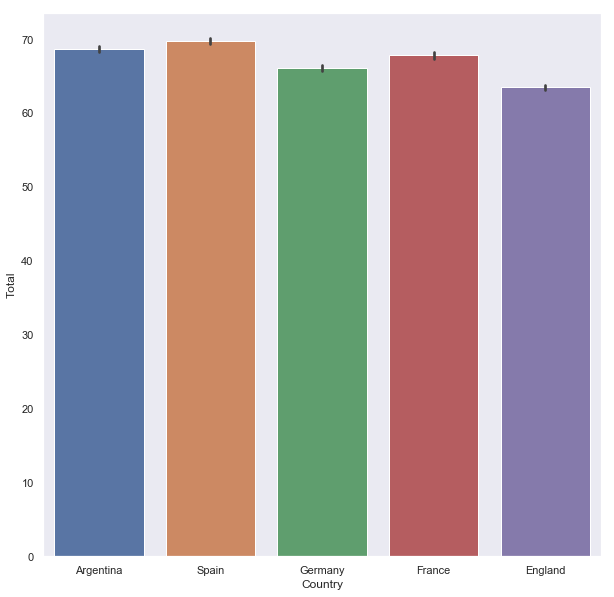

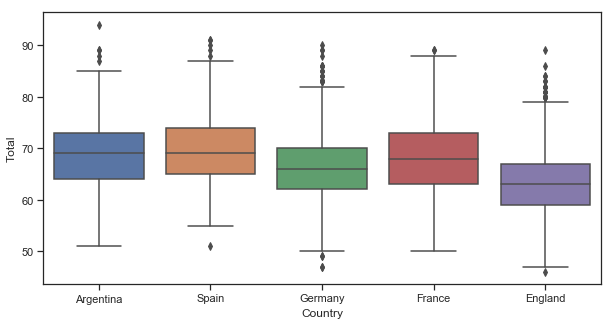

In [24]:
# Creating a bar plot of top 5 countries according to their players overall ratings
player_countries = soccer_data['Nationality'].value_counts().head(5).index.values
player_countries_data = soccer_data.loc[soccer_data['Nationality'].isin(player_countries),:]

sns.set(style="dark")
plt.figure(figsize=(10,10))
p=sns.barplot(x='Nationality',y='Overall',data = player_countries_data)
p.set(xlabel='Country', ylabel='Total')

plt.show()

# Creating a boxplot for same data to get a better view of spread 9which the bar plot does not provide for 
sns.set(style="ticks")
plt.figure(figsize=(10,5))
p=sns.boxplot(x='Nationality',y='Overall',data= player_countries_data)
p.set(xlabel='Country', ylabel='Total')

plt.show()

Text(0.5, 1.0, 'Count of Players')

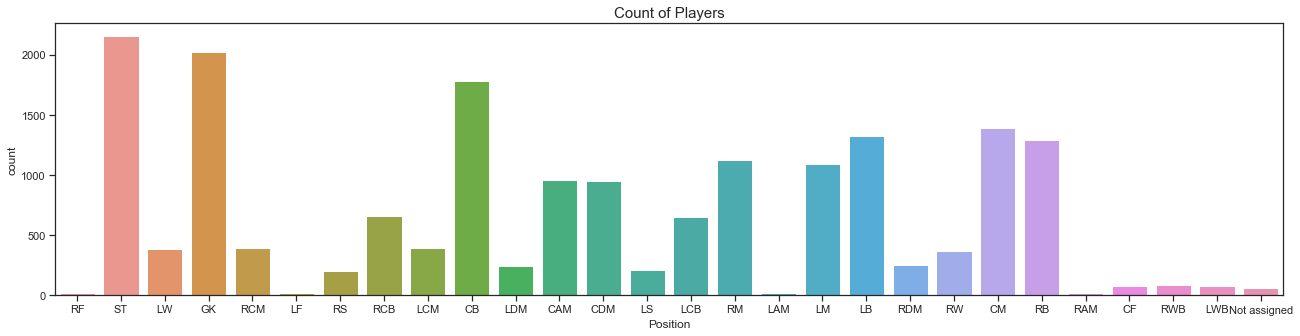

In [34]:
# Creating a seaborn bar chart of all player positions to see which positions are filled most in the data
plt.figure(1,figsize=(22,5))
p = sns.countplot(x = 'Position', data = soccer_data)
p.set_title(label='Count of Players', fontsize=15)

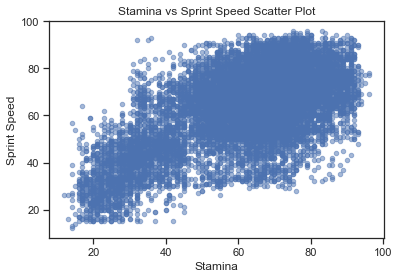

In [15]:
# Creating a scatter plot for relationship between stamina and sprintspeed
soccer_data.plot(kind = 'scatter' , x= 'Stamina' , y = 'SprintSpeed' , alpha = .5 , color = 'b')
plt.xlabel('Stamina')
plt.ylabel('Sprint Speed')
plt.title('Stamina vs Sprint Speed Scatter Plot')
plt.show()

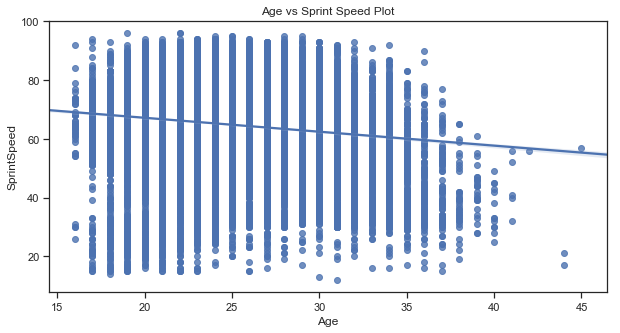

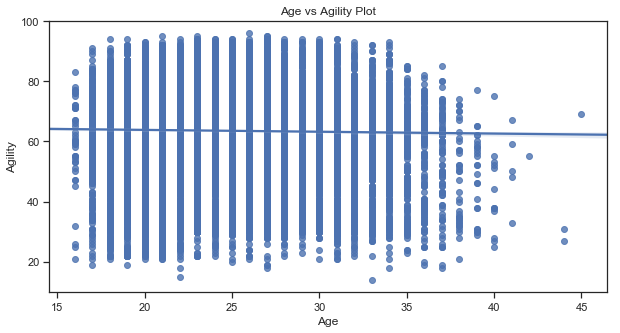

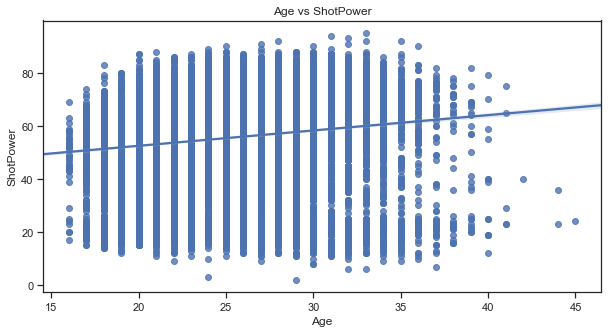

In [16]:
# Creating a regplot for relationship between age and sprintspeed
plt.figure(1,figsize=(10,5))
sns.regplot(soccer_data['Age'], soccer_data['SprintSpeed'])
plt.title('Age vs Sprint Speed Plot')
plt.show()

# Creating a regplot for relationship between age and agility
plt.figure(1,figsize=(10,5))
sns.regplot(soccer_data['Age'], soccer_data['Agility'])
plt.title('Age vs Agility Plot')
plt.show()

# Creating a regplot for relationship between age and shotpower
plt.figure(1,figsize=(10,5))
sns.regplot(soccer_data['Age'], soccer_data['ShotPower'])
plt.title('Age vs ShotPower')
plt.show()

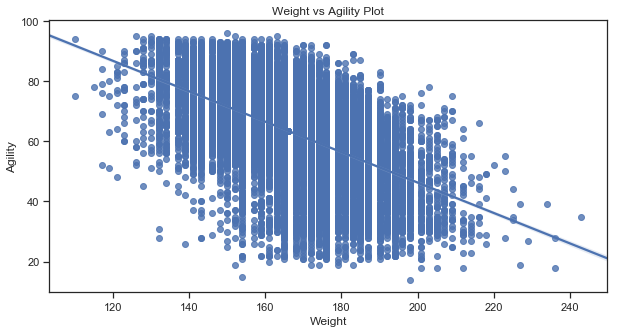

In [17]:
# Creating a regplot for relationship between weight and shotpower
plt.figure(1,figsize=(10,5))
sns.regplot(soccer_data['Weight'], soccer_data['Agility'])
plt.title('Weight vs Agility Plot')
plt.show()

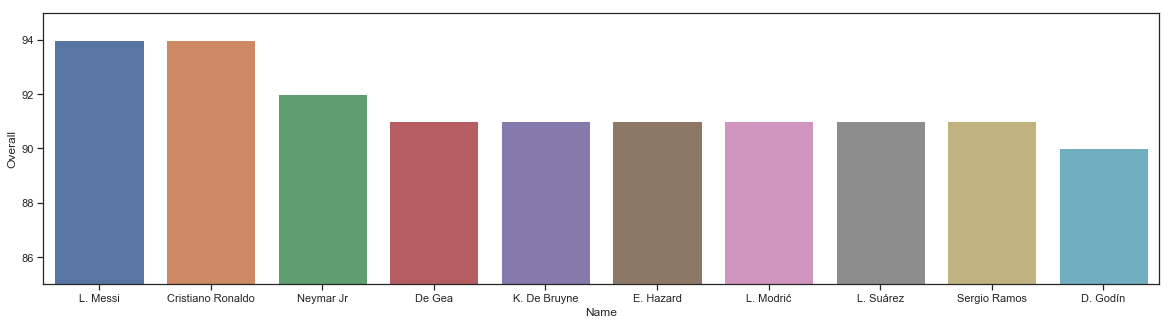

In [35]:
# Creating a barplot for overall player ratings top 10
top10 = soccer_data.sort_values(by='Overall',ascending=False).head(10)
plt.figure(figsize=(20,5))
p = sns.barplot(x='Name',y='Overall',data = top10)
p = plt.ylim(85,95)
p = plt.xticks(rotation='horizontal')

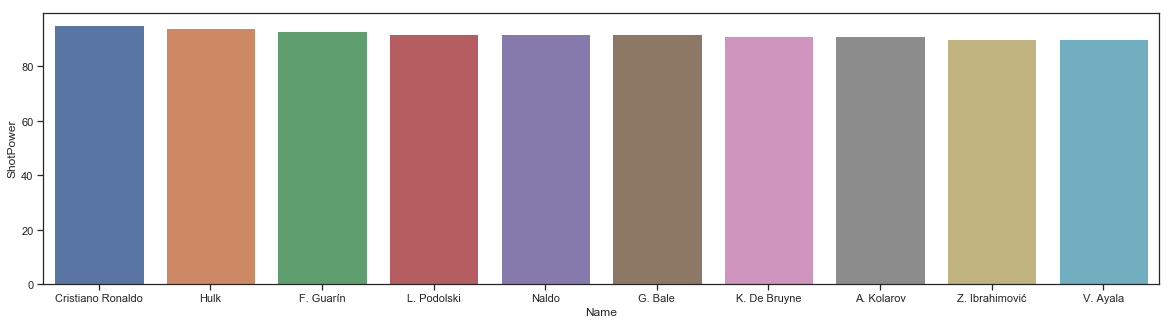

In [36]:
# Creating a barplot for top 10 players shotpower
top10_shotpower = soccer_data.sort_values(by='ShotPower',ascending = False).head(10)
plt.figure(figsize=(20,5))
p = sns.barplot(x='Name',y='ShotPower',data=top10_shotpower)
p = plt.xticks(rotation='horizontal')

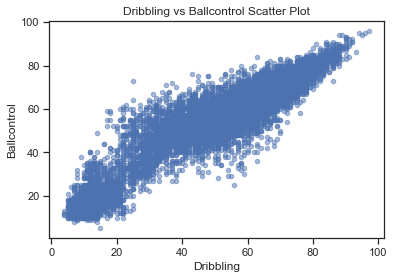

In [20]:
# Creating a scatterplot for the relationship betweendribbling and ball control
soccer_data.plot(kind = 'scatter' , x= 'Dribbling' , y = 'BallControl' , alpha = .5 , color = 'b')
plt.xlabel('Dribbling')
plt.ylabel('Ballcontrol')
plt.title('Dribbling vs Ballcontrol Scatter Plot')
plt.show()

                Club  Overall  Wage
0        Real Madrid     2582  5017
1       FC Barcelona     2575  4837
2    Manchester City     2532  3741
3  Manchester United     2549  3391
4           Juventus     2057  3292


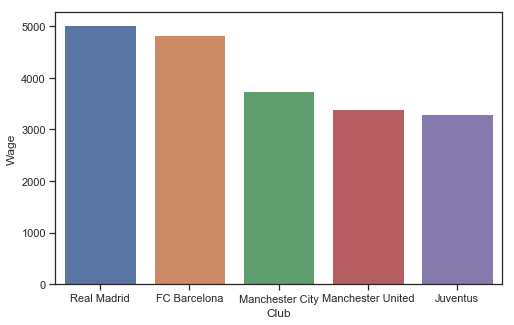

In [21]:
# Creating barplot of top 5 clubs wages
# creating a new dataframe based on club for sum of overall and wage values
group_club = soccer_data.groupby(['Club']).sum()[['Overall','Wage']]
df_top_10_club_value = group_club.sort_values(by='Wage',ascending=False).head(5)
df_top_10_club_value.reset_index(inplace=True)
print(df_top_10_club_value)

fig = plt.figure(figsize=(8, 5))
p = sns.barplot(x='Club',y='Wage',data=df_top_10_club_value)
p = plt.xticks(rotation='horizontal')

In [37]:
# Creating a scatter graph from bokeh library to show the relationship between acceleration and sprint speed

from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import LinearAxis

plot = figure(plot_width = 450, plot_height = 350)
xaxis = LinearAxis(axis_label="Acceleration")
yaxis = LinearAxis(axis_label="Sprint Speed")
plot.add_layout(xaxis, 'below')
plot.add_layout(yaxis, 'left')
plot.circle(soccer_data['Acceleration'], soccer_data['SprintSpeed'], size = 1)
show(plot)